In [7]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('ebola_2014_2016_clean.csv')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2485 entries, 0 to 2484
Data columns (total 10 columns):
Country                                            2485 non-null object
Date                                               2485 non-null object
No. of suspected cases                             2366 non-null float64
No. of probable cases                              2436 non-null float64
No. of confirmed cases                             2484 non-null float64
No. of confirmed, probable and suspected cases     2477 non-null float64
No. of suspected deaths                            1308 non-null float64
No. of probable deaths                             1526 non-null float64
No. of confirmed deaths                            1648 non-null float64
No. of confirmed, probable and suspected deaths    2485 non-null float64
dtypes: float64(8), object(2)
memory usage: 194.3+ KB


In [4]:
df.head()

,Country,Date,No. of suspected cases,No. of probable cases,No. of confirmed cases,"No. of confirmed, probable and suspected cases",No. of suspected deaths,No. of probable deaths,No. of confirmed deaths,"No. of confirmed, probable and suspected deaths"
0,Guinea,2014-08-29,25.0,141.0,482.0,648.0,2.0,141.0,287.0,430.0
1,Nigeria,2014-08-29,3.0,1.0,15.0,19.0,0.0,1.0,6.0,7.0
2,Sierra Leone,2014-08-29,54.0,37.0,935.0,1026.0,8.0,34.0,380.0,422.0
3,Liberia,2014-08-29,382.0,674.0,322.0,1378.0,168.0,301.0,225.0,694.0
4,Sierra Leone,2014-09-05,78.0,37.0,1146.0,1261.0,11.0,37.0,443.0,491.0


In [6]:
df.columns

Index(['Country', 'Date', 'No. of suspected cases', 'No. of probable cases',
       'No. of confirmed cases',
       'No. of confirmed, probable and suspected cases',
       'No. of suspected deaths', 'No. of probable deaths',
       'No. of confirmed deaths',
       'No. of confirmed, probable and suspected deaths'],
      dtype='object')

In [13]:
df.Country.unique()

array(['Guinea', 'Nigeria', 'Sierra Leone', 'Liberia', 'Senegal',
       'United States of America', 'Spain', 'Mali', 'United Kingdom',
       'Italy'], dtype=object)

In [22]:
df_SL = df.loc[df.Country=='Sierra Leone']
df_NG = df.loc[df.Country=='United States of America']

In [23]:
df_NG.head()

,Country,Date,No. of suspected cases,No. of probable cases,No. of confirmed cases,"No. of confirmed, probable and suspected cases",No. of suspected deaths,No. of probable deaths,No. of confirmed deaths,"No. of confirmed, probable and suspected deaths"
49,United States of America,2014-10-03,NaN,NaN,1.0,1.0,NaN,NaN,0.0,0.0
56,United States of America,2014-10-08,NaN,NaN,1.0,1.0,NaN,NaN,0.0,0.0
61,United States of America,2014-10-10,NaN,NaN,1.0,1.0,NaN,NaN,0.0,0.0
68,United States of America,2014-10-15,NaN,NaN,2.0,2.0,NaN,NaN,1.0,1.0
79,United States of America,2014-10-17,NaN,NaN,3.0,3.0,NaN,NaN,1.0,1.0


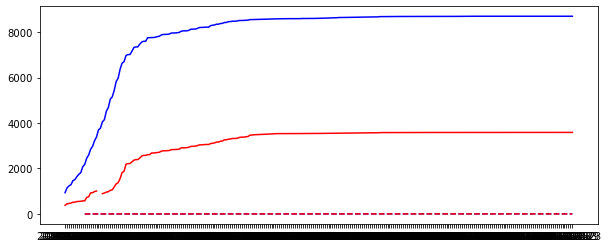

In [24]:
plt.figure(figsize=(10,4))
plt.plot(df_SL['Date'], df_SL['No. of confirmed cases'], 'b-')
plt.plot(df_SL['Date'], df_SL['No. of confirmed deaths'], 'r-')
plt.plot(df_NG['Date'], df_NG['No. of confirmed cases'], 'b--')
plt.plot(df_NG['Date'], df_NG['No. of confirmed deaths'], 'r--')

In [ ]:
df_SL

In [25]:
df_SL = df.loc[df.Date>'2014-10-03']

In [26]:
df_SL.head()

,Country,Date,No. of suspected cases,No. of probable cases,No. of confirmed cases,"No. of confirmed, probable and suspected cases",No. of suspected deaths,No. of probable deaths,No. of confirmed deaths,"No. of confirmed, probable and suspected deaths"
55,Nigeria,2014-10-08,0.0,1.0,19.0,20.0,0.0,1.0,7.0,8.0
56,United States of America,2014-10-08,NaN,NaN,1.0,1.0,NaN,NaN,0.0,0.0
57,Senegal,2014-10-08,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
58,Guinea,2014-10-08,74.0,180.0,1044.0,1298.0,2.0,179.0,587.0,768.0
59,Sierra Leone,2014-10-08,297.0,37.0,2455.0,2789.0,31.0,123.0,725.0,879.0


In [27]:
len(df_SL)

2430

In [28]:
df.Country.unique()

array(['Guinea', 'Nigeria', 'Sierra Leone', 'Liberia', 'Senegal',
       'United States of America', 'Spain', 'Mali', 'United Kingdom',
       'Italy'], dtype=object)

In [30]:
df_SL["No. of confirmed deaths"].max()

3589.0

In [38]:
countries = []
max_deaths = []
for country in df.Country.unique():
    countries.append(country)
    df_country = df.loc[df.Country==country]
    maxdeaths_per_country = df_country["No. of confirmed deaths"].max()
    max_deaths.append(maxdeaths_per_country)

In [39]:
countries

['Guinea',
 'Nigeria',
 'Sierra Leone',
 'Liberia',
 'Senegal',
 'United States of America',
 'Spain',
 'Mali',
 'United Kingdom',
 'Italy']

In [40]:
max_deaths

[2083.0, 7.0, 3589.0, 3858.0, 0.0, 1.0, 0.0, 5.0, 0.0, 0.0]

<BarContainer object of 10 artists>

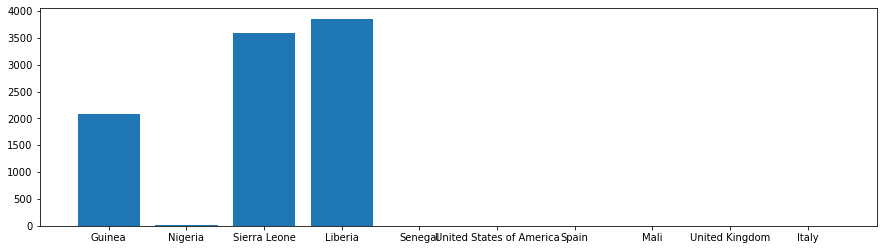

In [43]:
plt.figure(figsize=(15,4))
plt.bar(countries,max_deaths)